
## RNN for data with time delays


In [1]:

import pandas as pd
import numpy as np


In [2]:

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


In [3]:

import matplotlib 
## import pytorch_lightning as pl
import torch 

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable


In [4]:

## Requires Python = 3.9


In [5]:

for_RNN_data_CIVS = pd.read_csv('RNN_time_DELAYS_265736_1h6hPreCast_rcalix.csv')


In [6]:

for_RNN_data_CIVS.head(5)


,Unnamed: 0,SI_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3,Cast_Avg_Si_f2,Cast_Avg_Mn_f2,Slag_Fe_f2
0,0,1.152,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.559210,54.250139,1999.604384,179.749638,2.510680,0.0,4034.234339,992,1.048,0.546,0.05
1,1,1.152,8.079545,159.637733,252.459217,145.570895,226.360600,22.335329,18.731320,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992,1.048,0.546,0.05
2,2,1.152,8.074573,160.796544,252.645736,145.745252,230.297540,22.348590,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992,1.048,0.546,0.05
3,3,1.152,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.798490,2.496867,0.0,4012.024633,992,1.048,0.546,0.05
4,4,1.152,8.064630,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.784430,2.501961,0.0,4000.467204,992,1.048,0.546,0.05


In [7]:

for_RNN_data_CIVS


,Unnamed: 0,SI_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3,Cast_Avg_Si_f2,Cast_Avg_Mn_f2,Slag_Fe_f2
0,0,1.152000,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.559210,54.250139,1999.604384,179.749638,2.510680,0.0,4034.234339,992,1.048,0.546,0.05
1,1,1.152000,8.079545,159.637733,252.459217,145.570895,226.360600,22.335329,18.731320,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992,1.048,0.546,0.05
2,2,1.152000,8.074573,160.796544,252.645736,145.745252,230.297540,22.348590,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992,1.048,0.546,0.05
3,3,1.152000,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.798490,2.496867,0.0,4012.024633,992,1.048,0.546,0.05
4,4,1.152000,8.064630,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.784430,2.501961,0.0,4000.467204,992,1.048,0.546,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,265731,0.662065,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.000000,0.0,9680.930154,924,0.762,0.402,1.68
265732,265732,0.662446,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.000000,0.0,9665.389423,924,0.762,0.402,1.68
265733,265733,0.662826,5.167567,172.495783,205.875063,165.430489,222.902059,20.510840,17.813534,4.376959,55.693057,2162.032539,189.264351,0.000000,0.0,9652.217004,924,0.762,0.402,1.68
265734,265734,0.663207,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.000000,0.0,9661.236786,924,0.762,0.402,1.68


In [8]:

cols_list_DF = for_RNN_data_CIVS.columns.values.tolist()
cols_list_DF


['Unnamed: 0',
 'SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [9]:
l_new = ['SI_f1',
 'HOST_BLAST_MOISTURE_f3',
 'NE_Uptake_f3',
 'SE_Uptake_f3',
 'NW_Uptake_f3',
 'SW_Uptake_f3',
 'Selec_Top_Gas_CO_f3',
 'Selec_Top_Gas_CO2_f3',
 'Selec_Top_Gas_H2_f3',
 'Selec_Top_Gas_N2_f3',
 'HOT_BLAST_TMP_NS_f3',
 'WINDRATE_f3',
 'HIGH_PURITY_OXYGEN_f3',
 'COAL_FLOW_f3',
 'NAT_GAS _INJECTION_f3',
 'Coke_Rate_f3',
 'Cast_Avg_Si_f2',
 'Cast_Avg_Mn_f2',
 'Slag_Fe_f2']

In [10]:

for_RNN_data_CIVS = for_RNN_data_CIVS[l_new]


In [11]:

for_RNN_data_CIVS 


,SI_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3,Cast_Avg_Si_f2,Cast_Avg_Mn_f2,Slag_Fe_f2
0,1.152000,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.559210,54.250139,1999.604384,179.749638,2.510680,0.0,4034.234339,992,1.048,0.546,0.05
1,1.152000,8.079545,159.637733,252.459217,145.570895,226.360600,22.335329,18.731320,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992,1.048,0.546,0.05
2,1.152000,8.074573,160.796544,252.645736,145.745252,230.297540,22.348590,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992,1.048,0.546,0.05
3,1.152000,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.798490,2.496867,0.0,4012.024633,992,1.048,0.546,0.05
4,1.152000,8.064630,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.784430,2.501961,0.0,4000.467204,992,1.048,0.546,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,0.662065,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.000000,0.0,9680.930154,924,0.762,0.402,1.68
265732,0.662446,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.000000,0.0,9665.389423,924,0.762,0.402,1.68
265733,0.662826,5.167567,172.495783,205.875063,165.430489,222.902059,20.510840,17.813534,4.376959,55.693057,2162.032539,189.264351,0.000000,0.0,9652.217004,924,0.762,0.402,1.68
265734,0.663207,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.000000,0.0,9661.236786,924,0.762,0.402,1.68


In [12]:

for_RNN_data_CIVS.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265736 entries, 0 to 265735
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SI_f1                   265736 non-null  float64
 1   HOST_BLAST_MOISTURE_f3  265736 non-null  float64
 2   NE_Uptake_f3            265736 non-null  float64
 3   SE_Uptake_f3            265736 non-null  float64
 4   NW_Uptake_f3            265736 non-null  float64
 5   SW_Uptake_f3            265736 non-null  float64
 6   Selec_Top_Gas_CO_f3     265736 non-null  float64
 7   Selec_Top_Gas_CO2_f3    265736 non-null  float64
 8   Selec_Top_Gas_H2_f3     265736 non-null  float64
 9   Selec_Top_Gas_N2_f3     265736 non-null  float64
 10  HOT_BLAST_TMP_NS_f3     265736 non-null  float64
 11  WINDRATE_f3             265736 non-null  float64
 12  HIGH_PURITY_OXYGEN_f3   265736 non-null  float64
 13  COAL_FLOW_f3            265736 non-null  float64
 14  NAT_GAS _INJECTION_f

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

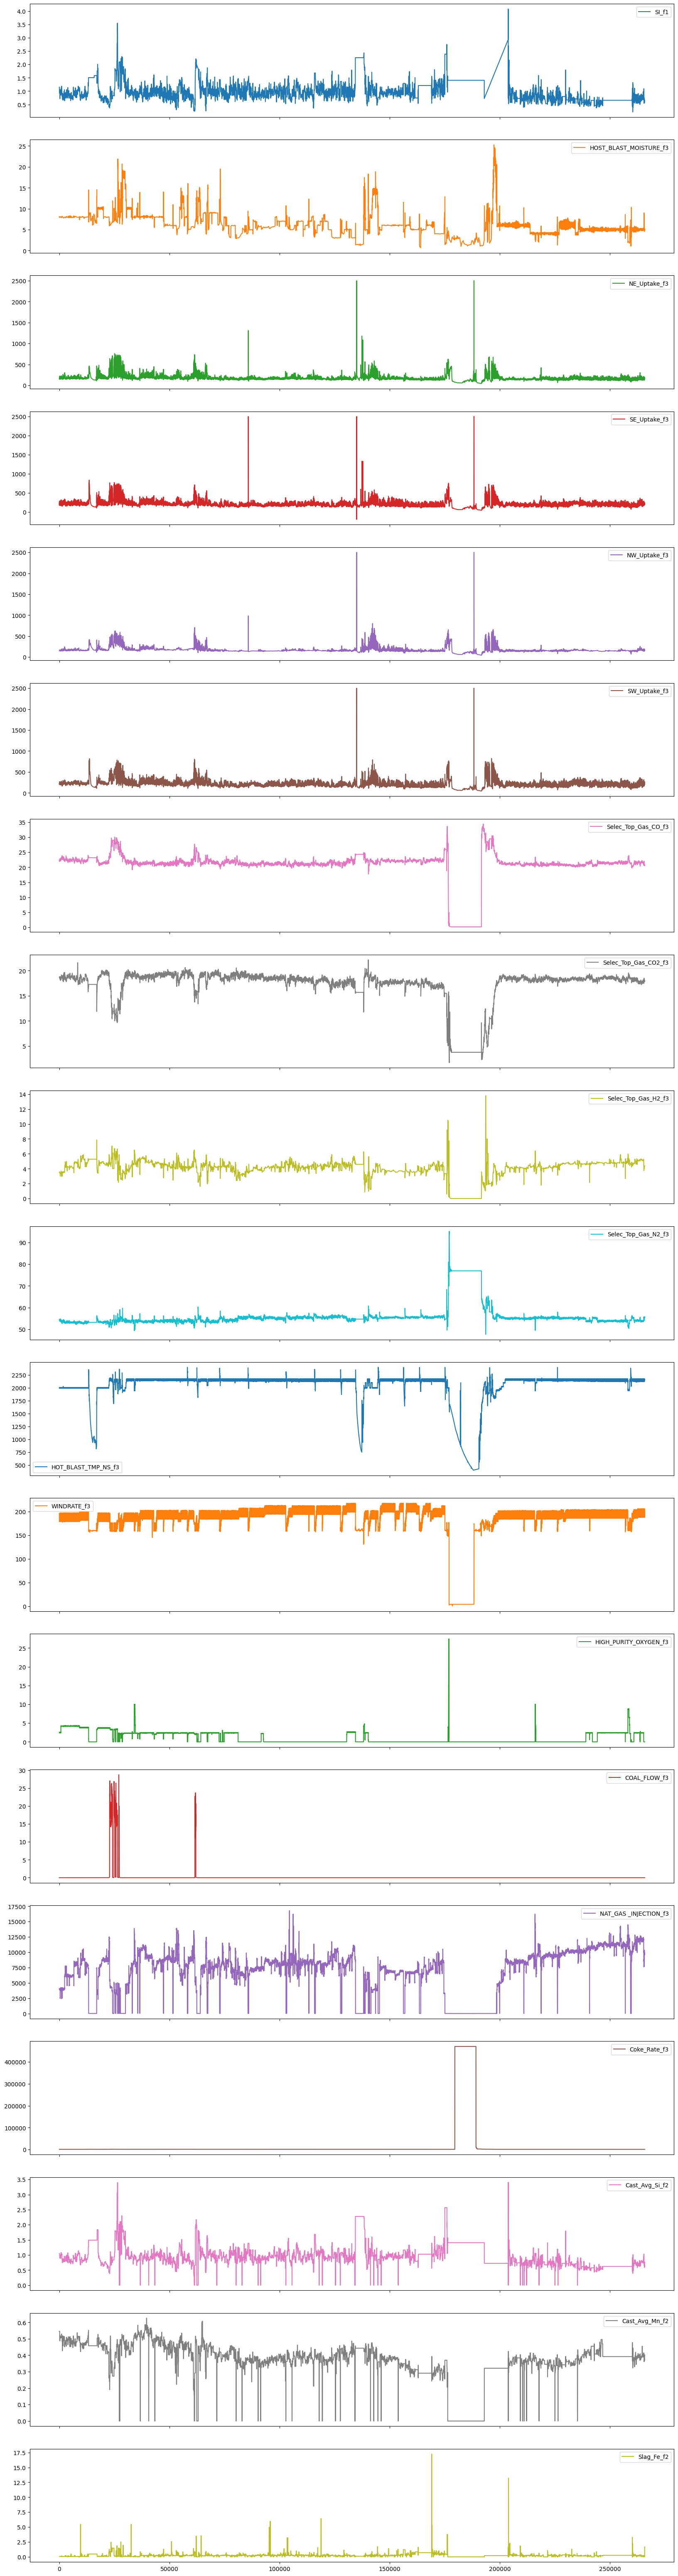

In [13]:

for_RNN_data_CIVS.plot( figsize=(20,80),  subplots=True   )


In [14]:

for_RNN_data_CIVS


,SI_f1,HOST_BLAST_MOISTURE_f3,NE_Uptake_f3,SE_Uptake_f3,NW_Uptake_f3,SW_Uptake_f3,Selec_Top_Gas_CO_f3,Selec_Top_Gas_CO2_f3,Selec_Top_Gas_H2_f3,Selec_Top_Gas_N2_f3,HOT_BLAST_TMP_NS_f3,WINDRATE_f3,HIGH_PURITY_OXYGEN_f3,COAL_FLOW_f3,NAT_GAS _INJECTION_f3,Coke_Rate_f3,Cast_Avg_Si_f2,Cast_Avg_Mn_f2,Slag_Fe_f2
0,1.152000,8.084517,158.478922,245.634175,145.396538,220.717349,22.322068,18.729296,3.559210,54.250139,1999.604384,179.749638,2.510680,0.0,4034.234339,992,1.048,0.546,0.05
1,1.152000,8.079545,159.637733,252.459217,145.570895,226.360600,22.335329,18.731320,3.559234,54.194257,2000.288837,179.765945,2.489381,0.0,4024.947376,992,1.048,0.546,0.05
2,1.152000,8.074573,160.796544,252.645736,145.745252,230.297540,22.348590,18.733343,3.559259,54.138374,1999.242862,179.782251,2.489037,0.0,4011.601682,992,1.048,0.546,0.05
3,1.152000,8.069602,161.955355,247.987563,145.919609,225.220292,22.361852,18.735367,3.559284,54.082797,1999.884442,179.798490,2.496867,0.0,4012.024633,992,1.048,0.546,0.05
4,1.152000,8.064630,163.102736,226.923719,146.093966,218.827693,22.375113,18.737391,3.559309,54.063779,1999.849729,179.784430,2.501961,0.0,4000.467204,992,1.048,0.546,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265731,0.662065,5.155158,168.935281,202.117809,163.555824,219.714757,20.510372,17.817248,4.376637,55.682915,2162.689809,188.599806,0.000000,0.0,9680.930154,924,0.762,0.402,1.68
265732,0.662446,5.161362,170.715532,202.106673,164.493156,220.911245,20.510606,17.815391,4.376798,55.688159,2162.438593,188.536026,0.000000,0.0,9665.389423,924,0.762,0.402,1.68
265733,0.662826,5.167567,172.495783,205.875063,165.430489,222.902059,20.510840,17.813534,4.376959,55.693057,2162.032539,189.264351,0.000000,0.0,9652.217004,924,0.762,0.402,1.68
265734,0.663207,5.173771,174.440392,212.764586,166.688229,232.269437,20.511074,17.811677,4.377119,55.697567,2160.858603,189.426471,0.000000,0.0,9661.236786,924,0.762,0.402,1.68



## Create datasets of selected features


In [15]:

pd.options.display.max_columns = None


In [16]:

def window_seq_conversion_multi_feature(df, window, target_index):
    d = df.values
    ## print( d )
    print( d.shape )
    x = []
    n = len(df)
    n_features = df.shape[1]
    ## print(n_features)
    ## print(n)

    idx = df.index[ : -window]
    print(idx)
    print(  idx.shape  )


    for start in range(n-window):
        end = start + window
        ## print(start, "....", end)
        x.append( d[ start:end, : ] )

    ## print(x)
    cols_x = [ f'x_{i}_fx_{j}' for i in range(1, window+1) for j in range(0, n_features)]
    cols_y = [ f'y_fy_{j}' for j in range(0, n_features)]
    ## print(  cols  )

    x = np.array(x)
    print(x.shape)
    x = np.array(x).reshape(n-window, -1)
    print(x.shape)

    y = df.iloc[ window: , : ].values
    print( y.shape )
    ## print( y.reshape(-1).shape )

    df_xs = pd.DataFrame(x  , columns=cols_x,  index=idx)
    df_y  = pd.DataFrame(y  , columns=cols_y,  index=idx)
    ## print(df_y)
    return pd.concat( [df_xs, df_y], axis=1 )



## RNN Important Parameters


In [17]:

window                = 30          ## seq length

silicon_feature_index = 0



## Make Data Sequential


In [18]:

 
res_multi_feature_df = window_seq_conversion_multi_feature( for_RNN_data_CIVS, window,  silicon_feature_index )


(265736, 19)
RangeIndex(start=0, stop=265706, step=1)
(265706,)
(265706, 30, 19)
(265706, 570)
(265706, 19)


In [19]:

res_multi_feature_df


,x_1_fx_0,x_1_fx_1,x_1_fx_2,x_1_fx_3,x_1_fx_4,x_1_fx_5,x_1_fx_6,x_1_fx_7,x_1_fx_8,x_1_fx_9,x_1_fx_10,x_1_fx_11,x_1_fx_12,x_1_fx_13,x_1_fx_14,x_1_fx_15,x_1_fx_16,x_1_fx_17,x_1_fx_18,x_2_fx_0,x_2_fx_1,x_2_fx_2,x_2_fx_3,x_2_fx_4,x_2_fx_5,x_2_fx_6,x_2_fx_7,x_2_fx_8,x_2_fx_9,x_2_fx_10,x_2_fx_11,x_2_fx_12,x_2_fx_13,x_2_fx_14,x_2_fx_15,x_2_fx_16,x_2_fx_17,x_2_fx_18,x_3_fx_0,x_3_fx_1,x_3_fx_2,x_3_fx_3,x_3_fx_4,x_3_fx_5,x_3_fx_6,x_3_fx_7,x_3_fx_8,x_3_fx_9,x_3_fx_10,x_3_fx_11,x_3_fx_12,x_3_fx_13,x_3_fx_14,x_3_fx_15,x_3_fx_16,x_3_fx_17,x_3_fx_18,x_4_fx_0,x_4_fx_1,x_4_fx_2,x_4_fx_3,x_4_fx_4,x_4_fx_5,x_4_fx_6,x_4_fx_7,x_4_fx_8,x_4_fx_9,x_4_fx_10,x_4_fx_11,x_4_fx_12,x_4_fx_13,x_4_fx_14,x_4_fx_15,x_4_fx_16,x_4_fx_17,x_4_fx_18,x_5_fx_0,x_5_fx_1,x_5_fx_2,x_5_fx_3,x_5_fx_4,x_5_fx_5,x_5_fx_6,x_5_fx_7,x_5_fx_8,x_5_fx_9,x_5_fx_10,x_5_fx_11,x_5_fx_12,x_5_fx_13,x_5_fx_14,x_5_fx_15,x_5_fx_16,x_5_fx_17,x_5_fx_18,x_6_fx_0,x_6_fx_1,x_6_fx_2,x_6_fx_3,x_6_fx_4,x_6_fx_5,x_6_fx_6,x_6_fx_7,x_6_fx_8,x_6_fx_9,x_6_fx_10,x_6_fx_11,x_6_fx_12,x_6_fx_13,x_6_fx_14,x_6_fx_15,x_6_fx_16,x_6_fx_17,x_6_fx_18,x_7_fx_0,x_7_fx_1,x_7_fx_2,x_7_fx_3,x_7_fx_4,x_7_fx_5,x_7_fx_6,x_7_fx_7,x_7_fx_8,x_7_fx_9,x_7_fx_10,x_7_fx_11,x_7_fx_12,x_7_fx_13,x_7_fx_14,x_7_fx_15,x_7_fx_16,x_7_fx_17,x_7_fx_18,x_8_fx_0,x_8_fx_1,x_8_fx_2,x_8_fx_3,x_8_fx_4,x_8_fx_5,x_8_fx_6,x_8_fx_7,x_8_fx_8,x_8_fx_9,x_8_fx_10,x_8_fx_11,x_8_fx_12,x_8_fx_13,x_8_fx_14,x_8_fx_15,x_8_fx_16,x_8_fx_17,x_8_fx_18,x_9_fx_0,x_9_fx_1,x_9_fx_2,x_9_fx_3,x_9_fx_4,x_9_fx_5,x_9_fx_6,x_9_fx_7,x_9_fx_8,x_9_fx_9,x_9_fx_10,x_9_fx_11,x_9_fx_12,x_9_fx_13,x_9_fx_14,x_9_fx_15,x_9_fx_16,x_9_fx_17,x_9_fx_18,x_10_fx_0,x_10_fx_1,x_10_fx_2,x_10_fx_3,x_10_fx_4,x_10_fx_5,x_10_fx_6,x_10_fx_7,x_10_fx_8,x_10_fx_9,x_10_fx_10,x_10_fx_11,x_10_fx_12,x_10_fx_13,x_10_fx_14,x_10_fx_15,x_10_fx_16,x_10_fx_17,x_10_fx_18,x_11_fx_0,x_11_fx_1,x_11_fx_2,x_11_fx_3,x_11_fx_4,x_11_fx_5,x_11_fx_6,x_11_fx_7,x_11_fx_8,x_11_fx_9,x_11_fx_10,x_11_fx_11,x_11_fx_12,x_11_fx_13,x_11_fx_14,x_11_fx_15,x_11_fx_16,x_11_fx_17,x_11_fx_18,x_12_fx_0,x_12_fx_1,x_12_fx_2,x_12_fx_3,x_12_fx_4,x_12_fx_5,x_12_fx_6,x_12_fx_7,x_12_fx_8,x_12_fx_9,x_12_fx_10,x_12_fx_11,x_12_fx_12,x_12_fx_13,x_12_fx_14,x_12_fx_15,x_12_fx_16,x_12_fx_17,x_12_fx_18,x_13_fx_0,x_13_fx_1,x_13_fx_2,x_13_fx_3,x_13_fx_4,x_13_fx_5,x_13_fx_6,x_13_fx_7,x_13_fx_8,x_13_fx_9,x_13_fx_10,x_13_fx_11,x_13_fx_12,x_13_fx_13,x_13_fx_14,x_13_fx_15,x_13_fx_16,x_13_fx_17,x_13_fx_18,x_14_fx_0,x_14_fx_1,x_14_fx_2,x_14_fx_3,x_14_fx_4,x_14_fx_5,x_14_fx_6,x_14_fx_7,x_14_fx_8,x_14_fx_9,x_14_fx_10,x_14_fx_11,x_14_fx_12,x_14_fx_13,x_14_fx_14,x_14_fx_15,x_14_fx_16,x_14_fx_17,x_14_fx_18,x_15_fx_0,x_15_fx_1,x_15_fx_2,x_15_fx_3,x_15_fx_4,x_15_fx_5,x_15_fx_6,x_15_fx_7,x_15_fx_8,x_15_fx_9,x_15_fx_10,x_15_fx_11,x_15_fx_12,x_15_fx_13,x_15_fx_14,x_15_fx_15,x_15_fx_16,x_15_fx_17,x_15_fx_18,x_16_fx_0,x_16_fx_1,x_16_fx_2,x_16_fx_3,x_16_fx_4,x_16_fx_5,x_16_fx_6,x_16_fx_7,x_16_fx_8,x_16_fx_9,x_16_fx_10,x_16_fx_11,x_16_fx_12,x_16_fx_13,x_16_fx_14,x_16_fx_15,x_16_fx_16,x_16_fx_17,x_16_fx_18,x_17_fx_0,x_17_fx_1,x_17_fx_2,x_17_fx_3,x_17_fx_4,x_17_fx_5,x_17_fx_6,x_17_fx_7,x_17_fx_8,x_17_fx_9,x_17_fx_10,x_17_fx_11,x_17_fx_12,x_17_fx_13,x_17_fx_14,x_17_fx_15,x_17_fx_16,x_17_fx_17,x_17_fx_18,x_18_fx_0,x_18_fx_1,x_18_fx_2,x_18_fx_3,x_18_fx_4,x_18_fx_5,x_18_fx_6,x_18_fx_7,x_18_fx_8,x_18_fx_9,x_18_fx_10,x_18_fx_11,x_18_fx_12,x_18_fx_13,x_18_fx_14,x_18_fx_15,x_18_fx_16,x_18_fx_17,x_18_fx_18,x_19_fx_0,x_19_fx_1,x_19_fx_2,x_19_fx_3,x_19_fx_4,x_19_fx_5,x_19_fx_6,x_19_fx_7,x_19_fx_8,x_19_fx_9,x_19_fx_10,x_19_fx_11,x_19_fx_12,x_19_fx_13,x_19_fx_14,x_19_fx_15,x_19_fx_16,x_19_fx_17,x_19_fx_18,x_20_fx_0,x_20_fx_1,x_20_fx_2,x_20_fx_3,x_20_fx_4,x_20_fx_5,x_20_fx_6,x_20_fx_7,x_20_fx_8,x_20_fx_9,x_20_fx_10,x_20_fx_11,x_20_fx_12,x_20_fx_13,x_20_fx_14,x_20_fx_15,x_20_fx_16,x_20_fx_17,x_20_fx_18,x_21_fx_0,x_21_fx_1,x_21_fx_2,x_21_fx_3,x_21_fx_4,x_21_fx_5,x_21_fx_6,x_21_fx_7,x_21_fx_8,x_21_fx_9,x_21_fx_10,x_21_fx_11,x_21_fx_12,x_21_fx_13,x_21_fx_14,x_21_fx_15,x_21_fx_16,x_21_fx_17,x_

In [20]:

print( res_multi_feature_df.shape )


(265706, 589)



## Drop desired columns from Sequential Data Frame (such as silicon from X)


In [21]:

df = res_multi_feature_df

df.drop(  list(   df.filter(regex='_fx_0')   ), axis=1, inplace=True)

no_silicon_in_seq_X_df = df

print( df.shape )


(265706, 559)


In [22]:

print( res_multi_feature_df.shape )


(265706, 559)


In [23]:

res_multi_feature_df


,x_1_fx_1,x_1_fx_2,x_1_fx_3,x_1_fx_4,x_1_fx_5,x_1_fx_6,x_1_fx_7,x_1_fx_8,x_1_fx_9,x_1_fx_10,x_1_fx_11,x_1_fx_12,x_1_fx_13,x_1_fx_14,x_1_fx_15,x_1_fx_16,x_1_fx_17,x_1_fx_18,x_2_fx_1,x_2_fx_2,x_2_fx_3,x_2_fx_4,x_2_fx_5,x_2_fx_6,x_2_fx_7,x_2_fx_8,x_2_fx_9,x_2_fx_10,x_2_fx_11,x_2_fx_12,x_2_fx_13,x_2_fx_14,x_2_fx_15,x_2_fx_16,x_2_fx_17,x_2_fx_18,x_3_fx_1,x_3_fx_2,x_3_fx_3,x_3_fx_4,x_3_fx_5,x_3_fx_6,x_3_fx_7,x_3_fx_8,x_3_fx_9,x_3_fx_10,x_3_fx_11,x_3_fx_12,x_3_fx_13,x_3_fx_14,x_3_fx_15,x_3_fx_16,x_3_fx_17,x_3_fx_18,x_4_fx_1,x_4_fx_2,x_4_fx_3,x_4_fx_4,x_4_fx_5,x_4_fx_6,x_4_fx_7,x_4_fx_8,x_4_fx_9,x_4_fx_10,x_4_fx_11,x_4_fx_12,x_4_fx_13,x_4_fx_14,x_4_fx_15,x_4_fx_16,x_4_fx_17,x_4_fx_18,x_5_fx_1,x_5_fx_2,x_5_fx_3,x_5_fx_4,x_5_fx_5,x_5_fx_6,x_5_fx_7,x_5_fx_8,x_5_fx_9,x_5_fx_10,x_5_fx_11,x_5_fx_12,x_5_fx_13,x_5_fx_14,x_5_fx_15,x_5_fx_16,x_5_fx_17,x_5_fx_18,x_6_fx_1,x_6_fx_2,x_6_fx_3,x_6_fx_4,x_6_fx_5,x_6_fx_6,x_6_fx_7,x_6_fx_8,x_6_fx_9,x_6_fx_10,x_6_fx_11,x_6_fx_12,x_6_fx_13,x_6_fx_14,x_6_fx_15,x_6_fx_16,x_6_fx_17,x_6_fx_18,x_7_fx_1,x_7_fx_2,x_7_fx_3,x_7_fx_4,x_7_fx_5,x_7_fx_6,x_7_fx_7,x_7_fx_8,x_7_fx_9,x_7_fx_10,x_7_fx_11,x_7_fx_12,x_7_fx_13,x_7_fx_14,x_7_fx_15,x_7_fx_16,x_7_fx_17,x_7_fx_18,x_8_fx_1,x_8_fx_2,x_8_fx_3,x_8_fx_4,x_8_fx_5,x_8_fx_6,x_8_fx_7,x_8_fx_8,x_8_fx_9,x_8_fx_10,x_8_fx_11,x_8_fx_12,x_8_fx_13,x_8_fx_14,x_8_fx_15,x_8_fx_16,x_8_fx_17,x_8_fx_18,x_9_fx_1,x_9_fx_2,x_9_fx_3,x_9_fx_4,x_9_fx_5,x_9_fx_6,x_9_fx_7,x_9_fx_8,x_9_fx_9,x_9_fx_10,x_9_fx_11,x_9_fx_12,x_9_fx_13,x_9_fx_14,x_9_fx_15,x_9_fx_16,x_9_fx_17,x_9_fx_18,x_10_fx_1,x_10_fx_2,x_10_fx_3,x_10_fx_4,x_10_fx_5,x_10_fx_6,x_10_fx_7,x_10_fx_8,x_10_fx_9,x_10_fx_10,x_10_fx_11,x_10_fx_12,x_10_fx_13,x_10_fx_14,x_10_fx_15,x_10_fx_16,x_10_fx_17,x_10_fx_18,x_11_fx_1,x_11_fx_2,x_11_fx_3,x_11_fx_4,x_11_fx_5,x_11_fx_6,x_11_fx_7,x_11_fx_8,x_11_fx_9,x_11_fx_10,x_11_fx_11,x_11_fx_12,x_11_fx_13,x_11_fx_14,x_11_fx_15,x_11_fx_16,x_11_fx_17,x_11_fx_18,x_12_fx_1,x_12_fx_2,x_12_fx_3,x_12_fx_4,x_12_fx_5,x_12_fx_6,x_12_fx_7,x_12_fx_8,x_12_fx_9,x_12_fx_10,x_12_fx_11,x_12_fx_12,x_12_fx_13,x_12_fx_14,x_12_fx_15,x_12_fx_16,x_12_fx_17,x_12_fx_18,x_13_fx_1,x_13_fx_2,x_13_fx_3,x_13_fx_4,x_13_fx_5,x_13_fx_6,x_13_fx_7,x_13_fx_8,x_13_fx_9,x_13_fx_10,x_13_fx_11,x_13_fx_12,x_13_fx_13,x_13_fx_14,x_13_fx_15,x_13_fx_16,x_13_fx_17,x_13_fx_18,x_14_fx_1,x_14_fx_2,x_14_fx_3,x_14_fx_4,x_14_fx_5,x_14_fx_6,x_14_fx_7,x_14_fx_8,x_14_fx_9,x_14_fx_10,x_14_fx_11,x_14_fx_12,x_14_fx_13,x_14_fx_14,x_14_fx_15,x_14_fx_16,x_14_fx_17,x_14_fx_18,x_15_fx_1,x_15_fx_2,x_15_fx_3,x_15_fx_4,x_15_fx_5,x_15_fx_6,x_15_fx_7,x_15_fx_8,x_15_fx_9,x_15_fx_10,x_15_fx_11,x_15_fx_12,x_15_fx_13,x_15_fx_14,x_15_fx_15,x_15_fx_16,x_15_fx_17,x_15_fx_18,x_16_fx_1,x_16_fx_2,x_16_fx_3,x_16_fx_4,x_16_fx_5,x_16_fx_6,x_16_fx_7,x_16_fx_8,x_16_fx_9,x_16_fx_10,x_16_fx_11,x_16_fx_12,x_16_fx_13,x_16_fx_14,x_16_fx_15,x_16_fx_16,x_16_fx_17,x_16_fx_18,x_17_fx_1,x_17_fx_2,x_17_fx_3,x_17_fx_4,x_17_fx_5,x_17_fx_6,x_17_fx_7,x_17_fx_8,x_17_fx_9,x_17_fx_10,x_17_fx_11,x_17_fx_12,x_17_fx_13,x_17_fx_14,x_17_fx_15,x_17_fx_16,x_17_fx_17,x_17_fx_18,x_18_fx_1,x_18_fx_2,x_18_fx_3,x_18_fx_4,x_18_fx_5,x_18_fx_6,x_18_fx_7,x_18_fx_8,x_18_fx_9,x_18_fx_10,x_18_fx_11,x_18_fx_12,x_18_fx_13,x_18_fx_14,x_18_fx_15,x_18_fx_16,x_18_fx_17,x_18_fx_18,x_19_fx_1,x_19_fx_2,x_19_fx_3,x_19_fx_4,x_19_fx_5,x_19_fx_6,x_19_fx_7,x_19_fx_8,x_19_fx_9,x_19_fx_10,x_19_fx_11,x_19_fx_12,x_19_fx_13,x_19_fx_14,x_19_fx_15,x_19_fx_16,x_19_fx_17,x_19_fx_18,x_20_fx_1,x_20_fx_2,x_20_fx_3,x_20_fx_4,x_20_fx_5,x_20_fx_6,x_20_fx_7,x_20_fx_8,x_20_fx_9,x_20_fx_10,x_20_fx_11,x_20_fx_12,x_20_fx_13,x_20_fx_14,x_20_fx_15,x_20_fx_16,x_20_fx_17,x_20_fx_18,x_21_fx_1,x_21_fx_2,x_21_fx_3,x_21_fx_4,x_21_fx_5,x_21_fx_6,x_21_fx_7,x_21_fx_8,x_21_fx_9,x_21_fx_10,x_21_fx_11,x_21_fx_12,x_21_fx_13,x_21_fx_14,x_21_fx_15,x_21_fx_16,x_21_fx_17,x_21_fx_18,x_22_fx_1,x_22_fx_2,x_22_fx_3,x_22_fx_4,x_22_fx_5,x_22_fx_6,x_22_fx_7,x_22_fx_8,x_22_fx_9,x_22_fx_10,x_22_fx_11,x_22_fx_12,x_22_fx_13,x_22_fx_14,x_22_fx_15,x_22_fx_16,x_22_fx_17,x_22_fx_18,x_2


## Utility Functions


In [24]:

class Standardize:
    
    def __init__(self, df, split=0.10):
        self.data  = df
        self.split = split
    
    def split_data(self):
        n           = int( len( self.data ) * self.split )
        train       = self.data.iloc[   :-n ] 
        test        = self.data.iloc[ -n:   ]
        n           = int( len(   train   ) * self.split )
        train       = train.iloc[   :-n ] 
        val         = train.iloc[ -n:   ]
        assert len(test) + len(train) + len(val) == len(self.data)
        return train, test, val
    
    def _transform(self, data):
        data_s = ( data - self.mu ) / self.sigma          
        return data_s
    
    def fit_transform(self):
        train, test, val    = self.split_data()
        self.mu             = train.mean() 
        self.sigma          = train.std()
        train_s             = self._transform( train )
        test_s              = self._transform( test  )
        val_s               = self._transform( val   )
        return train_s, test_s, val_s
    
    def inverse(self,   data):
        return ( data * self.sigma     ) + self.mu          ## all data
        
    def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        the_sigma = self.sigma[-19:]
        the_mu    = self.mu[-19:]

        the_sigma = np.expand_dims(the_sigma, axis=0)
        the_mu    = np.expand_dims(the_mu,    axis=0)

        print(the_sigma.shape)
        print(the_sigma.shape)
        
        return ( data * the_sigma ) + the_mu       


In [25]:

'''

x = np.expand_dims(x, axis=0)

'''


'\n\nx = np.expand_dims(x, axis=0)\n\n'

In [26]:

scale_civs = Standardize(  res_multi_feature_df , split=0.20 )


In [27]:

train_si, test_si, val_si = scale_civs.fit_transform()


In [28]:

train_si


,x_1_fx_1,x_1_fx_2,x_1_fx_3,x_1_fx_4,x_1_fx_5,x_1_fx_6,x_1_fx_7,x_1_fx_8,x_1_fx_9,x_1_fx_10,x_1_fx_11,x_1_fx_12,x_1_fx_13,x_1_fx_14,x_1_fx_15,x_1_fx_16,x_1_fx_17,x_1_fx_18,x_2_fx_1,x_2_fx_2,x_2_fx_3,x_2_fx_4,x_2_fx_5,x_2_fx_6,x_2_fx_7,x_2_fx_8,x_2_fx_9,x_2_fx_10,x_2_fx_11,x_2_fx_12,x_2_fx_13,x_2_fx_14,x_2_fx_15,x_2_fx_16,x_2_fx_17,x_2_fx_18,x_3_fx_1,x_3_fx_2,x_3_fx_3,x_3_fx_4,x_3_fx_5,x_3_fx_6,x_3_fx_7,x_3_fx_8,x_3_fx_9,x_3_fx_10,x_3_fx_11,x_3_fx_12,x_3_fx_13,x_3_fx_14,x_3_fx_15,x_3_fx_16,x_3_fx_17,x_3_fx_18,x_4_fx_1,x_4_fx_2,x_4_fx_3,x_4_fx_4,x_4_fx_5,x_4_fx_6,x_4_fx_7,x_4_fx_8,x_4_fx_9,x_4_fx_10,x_4_fx_11,x_4_fx_12,x_4_fx_13,x_4_fx_14,x_4_fx_15,x_4_fx_16,x_4_fx_17,x_4_fx_18,x_5_fx_1,x_5_fx_2,x_5_fx_3,x_5_fx_4,x_5_fx_5,x_5_fx_6,x_5_fx_7,x_5_fx_8,x_5_fx_9,x_5_fx_10,x_5_fx_11,x_5_fx_12,x_5_fx_13,x_5_fx_14,x_5_fx_15,x_5_fx_16,x_5_fx_17,x_5_fx_18,x_6_fx_1,x_6_fx_2,x_6_fx_3,x_6_fx_4,x_6_fx_5,x_6_fx_6,x_6_fx_7,x_6_fx_8,x_6_fx_9,x_6_fx_10,x_6_fx_11,x_6_fx_12,x_6_fx_13,x_6_fx_14,x_6_fx_15,x_6_fx_16,x_6_fx_17,x_6_fx_18,x_7_fx_1,x_7_fx_2,x_7_fx_3,x_7_fx_4,x_7_fx_5,x_7_fx_6,x_7_fx_7,x_7_fx_8,x_7_fx_9,x_7_fx_10,x_7_fx_11,x_7_fx_12,x_7_fx_13,x_7_fx_14,x_7_fx_15,x_7_fx_16,x_7_fx_17,x_7_fx_18,x_8_fx_1,x_8_fx_2,x_8_fx_3,x_8_fx_4,x_8_fx_5,x_8_fx_6,x_8_fx_7,x_8_fx_8,x_8_fx_9,x_8_fx_10,x_8_fx_11,x_8_fx_12,x_8_fx_13,x_8_fx_14,x_8_fx_15,x_8_fx_16,x_8_fx_17,x_8_fx_18,x_9_fx_1,x_9_fx_2,x_9_fx_3,x_9_fx_4,x_9_fx_5,x_9_fx_6,x_9_fx_7,x_9_fx_8,x_9_fx_9,x_9_fx_10,x_9_fx_11,x_9_fx_12,x_9_fx_13,x_9_fx_14,x_9_fx_15,x_9_fx_16,x_9_fx_17,x_9_fx_18,x_10_fx_1,x_10_fx_2,x_10_fx_3,x_10_fx_4,x_10_fx_5,x_10_fx_6,x_10_fx_7,x_10_fx_8,x_10_fx_9,x_10_fx_10,x_10_fx_11,x_10_fx_12,x_10_fx_13,x_10_fx_14,x_10_fx_15,x_10_fx_16,x_10_fx_17,x_10_fx_18,x_11_fx_1,x_11_fx_2,x_11_fx_3,x_11_fx_4,x_11_fx_5,x_11_fx_6,x_11_fx_7,x_11_fx_8,x_11_fx_9,x_11_fx_10,x_11_fx_11,x_11_fx_12,x_11_fx_13,x_11_fx_14,x_11_fx_15,x_11_fx_16,x_11_fx_17,x_11_fx_18,x_12_fx_1,x_12_fx_2,x_12_fx_3,x_12_fx_4,x_12_fx_5,x_12_fx_6,x_12_fx_7,x_12_fx_8,x_12_fx_9,x_12_fx_10,x_12_fx_11,x_12_fx_12,x_12_fx_13,x_12_fx_14,x_12_fx_15,x_12_fx_16,x_12_fx_17,x_12_fx_18,x_13_fx_1,x_13_fx_2,x_13_fx_3,x_13_fx_4,x_13_fx_5,x_13_fx_6,x_13_fx_7,x_13_fx_8,x_13_fx_9,x_13_fx_10,x_13_fx_11,x_13_fx_12,x_13_fx_13,x_13_fx_14,x_13_fx_15,x_13_fx_16,x_13_fx_17,x_13_fx_18,x_14_fx_1,x_14_fx_2,x_14_fx_3,x_14_fx_4,x_14_fx_5,x_14_fx_6,x_14_fx_7,x_14_fx_8,x_14_fx_9,x_14_fx_10,x_14_fx_11,x_14_fx_12,x_14_fx_13,x_14_fx_14,x_14_fx_15,x_14_fx_16,x_14_fx_17,x_14_fx_18,x_15_fx_1,x_15_fx_2,x_15_fx_3,x_15_fx_4,x_15_fx_5,x_15_fx_6,x_15_fx_7,x_15_fx_8,x_15_fx_9,x_15_fx_10,x_15_fx_11,x_15_fx_12,x_15_fx_13,x_15_fx_14,x_15_fx_15,x_15_fx_16,x_15_fx_17,x_15_fx_18,x_16_fx_1,x_16_fx_2,x_16_fx_3,x_16_fx_4,x_16_fx_5,x_16_fx_6,x_16_fx_7,x_16_fx_8,x_16_fx_9,x_16_fx_10,x_16_fx_11,x_16_fx_12,x_16_fx_13,x_16_fx_14,x_16_fx_15,x_16_fx_16,x_16_fx_17,x_16_fx_18,x_17_fx_1,x_17_fx_2,x_17_fx_3,x_17_fx_4,x_17_fx_5,x_17_fx_6,x_17_fx_7,x_17_fx_8,x_17_fx_9,x_17_fx_10,x_17_fx_11,x_17_fx_12,x_17_fx_13,x_17_fx_14,x_17_fx_15,x_17_fx_16,x_17_fx_17,x_17_fx_18,x_18_fx_1,x_18_fx_2,x_18_fx_3,x_18_fx_4,x_18_fx_5,x_18_fx_6,x_18_fx_7,x_18_fx_8,x_18_fx_9,x_18_fx_10,x_18_fx_11,x_18_fx_12,x_18_fx_13,x_18_fx_14,x_18_fx_15,x_18_fx_16,x_18_fx_17,x_18_fx_18,x_19_fx_1,x_19_fx_2,x_19_fx_3,x_19_fx_4,x_19_fx_5,x_19_fx_6,x_19_fx_7,x_19_fx_8,x_19_fx_9,x_19_fx_10,x_19_fx_11,x_19_fx_12,x_19_fx_13,x_19_fx_14,x_19_fx_15,x_19_fx_16,x_19_fx_17,x_19_fx_18,x_20_fx_1,x_20_fx_2,x_20_fx_3,x_20_fx_4,x_20_fx_5,x_20_fx_6,x_20_fx_7,x_20_fx_8,x_20_fx_9,x_20_fx_10,x_20_fx_11,x_20_fx_12,x_20_fx_13,x_20_fx_14,x_20_fx_15,x_20_fx_16,x_20_fx_17,x_20_fx_18,x_21_fx_1,x_21_fx_2,x_21_fx_3,x_21_fx_4,x_21_fx_5,x_21_fx_6,x_21_fx_7,x_21_fx_8,x_21_fx_9,x_21_fx_10,x_21_fx_11,x_21_fx_12,x_21_fx_13,x_21_fx_14,x_21_fx_15,x_21_fx_16,x_21_fx_17,x_21_fx_18,x_22_fx_1,x_22_fx_2,x_22_fx_3,x_22_fx_4,x_22_fx_5,x_22_fx_6,x_22_fx_7,x_22_fx_8,x_22_fx_9,x_22_fx_10,x_22_fx_11,x_22_fx_12,x_22_fx_13,x_22_fx_14,x_22_fx_15,x_22_fx_16,x_22_fx_17,x_22_fx_18,x_2


## Some Sanity Checks


In [29]:

print( scale_civs.split)


0.2


In [30]:

print(f'''
SI: train: { len(train_si) } , val:{ len(val_si) }, test: { len(test_si) } 
''')



SI: train: 170052 , val:42513, test: 53141 



In [31]:

numpy_array = train_si.values
type(numpy_array)


numpy.ndarray

In [32]:

torch_tensor = torch.from_numpy(numpy_array)
type(torch_tensor)


torch.Tensor

In [33]:

from_torch_to_numpy = torch_tensor.detach().numpy()
type(from_torch_to_numpy)


numpy.ndarray


## Convert to Torch tensors Option 1


In [34]:

def Convert_to_RNN_tensors( list_data_civs ):
    
    y = [ torch.from_numpy(  col.iloc[ :,  -19: ].values.reshape(-1, 19)                         ).float()   for col in list_data_civs ]
    x = [ torch.from_numpy(  col.iloc[ :, :-19 ].values.reshape( *col.iloc[ :, :-19 ].shape )  ).float()   for col in list_data_civs ]
    
    return y, x


In [35]:

list_data_civs = [ train_si, val_si, test_si ]

y, x           = Convert_to_RNN_tensors(   list_data_civs  )


In [36]:

y_train_si = y[0]
y_val_si   = y[1]
y_test_si  = y[2]
x_train_si = x[0]
x_val_si   = x[1]
x_test_si  = x[2]


In [37]:

print( y_train_si.shape )
print(   y_val_si.shape ) 
print(  y_test_si.shape ) 
print( x_train_si.shape )
print(   x_val_si.shape )
print(  x_test_si.shape )


torch.Size([170052, 19])
torch.Size([42513, 19])
torch.Size([53141, 19])
torch.Size([170052, 540])
torch.Size([42513, 540])
torch.Size([53141, 540])



## Parameters (set these manually)


In [38]:

params_si = {
'seq_length': 30,       ## this is the window
'input_size': 18,  ## 4,            ## x input size -> my_4_cols = [  'SI_f1', 'HM_Temp_f1', 'Slag_CaO_f2', 'C_perce_sat_f1' ]
'output_size':19,
'units':32,                 ## neurons in hidden layers
'n_layers':1,
'epochs': 500,
'print_every': 25,
'lr': 0.01,
'train_data': (x_train_si, y_train_si),
'val_data':     (x_val_si, y_val_si),
'test_data':   (x_test_si, y_test_si),
'idx': test_si.index,                        ## needed for validation, use test set here
'scale': scale_civs
}



plt.rcParams["figure.figsize"] = [14, 5] 


In [39]:

test_si.index


RangeIndex(start=212565, stop=265706, step=1)

In [41]:

265706 - 212565


53141


## Training Function



In [42]:

def train_model_pt(model_type='RNN', **kwargs):
    """
    Parameters:
        input_size: input size
        output_size: output size
        n_features: number of features (hidden dimension)
        n_layers: number of layers
        train_data: tuple ex (x_train, y_train)
        val_data: tuple ex (x_val, y_val)
        epochs: number of epochs
        print_every: output and history tracking
        lr: learning rate
    """
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=kwargs['lr'])
    
    x_train, y_train = kwargs['train_data']
    x_val, y_val     = kwargs['val_data']
    x_test, y_test   = kwargs['test_data']
    
    history = {'loss': [], 'val_loss': []}
    # batch_size = x_train.shape[0]
    model.train()
    epochs      = kwargs['epochs']
    print_every = kwargs['print_every']

    ## epochs = 200
    
    for batch_i, epoch in enumerate(range(epochs)):

        
        h = model.init_hidden( x_train.shape[0])
        optimizer.zero_grad()
        
        pred, h = model( x_train, h )   #model(x_train)
        #hidden = hidden.data
  
        loss    = criterion(pred, y_train)        
        loss.backward()
        optimizer.step()
        
        if batch_i % print_every == 0:
            model.eval()
            with torch.no_grad():
                val_h        = model.init_hidden( x_val.shape[0] )
                val_p, val_h = model(x_val, val_h)
                val_loss     = criterion(val_p, y_val)
                history['val_loss'].append(val_loss.item())
            model.train()
            history['loss'].append(loss.item())
            print(f'{batch_i}/{epochs} - Loss:  {loss.item()}, val_loss: {val_loss.item()}')
    
    ## Prediction
    model.eval()
    with torch.no_grad():
        h0    = model.init_hidden( x_test.shape[0] )
        y_hat = model(x_test, h0)
        
    y_hat, _ = y_hat
    mse_loss_air = criterion(y_hat, y_test)
    print(f'Test MSE Loss: {mse_loss_air.item():.4f}')
    
    ## Plotting
    fig, ax = plt.subplots(2, 1) 

    ax[0].set_title(f'{model_type}: Loss and Validation Loss per epoch')
    ax[0].plot(history['loss'], 'k--', label='loss')
    ax[0].plot(history['val_loss'], 'k', label='val_loss')
    ax[0].legend()
    ax[1].set_title(f"{model_type} TEST MSE = {mse_loss_air.item():.4f}: Forecast vs Actual (Out-of-Sample data)")
    scale = kwargs['scale']
    print("ricardo check this")
    print(y_test.shape)
    print(y_hat.shape )
    actual = scale.inverse_y(y_test.detach().numpy() ) ## .ravel() )
    pred   = scale.inverse_y( y_hat.detach().numpy() ) ## .ravel() )
    idx = kwargs['idx']
    ##pd.Series(actual, index=idx).plot(style='k--', label='actual', alpha=0.65, color='blue')
    ##pd.Series(pred,   index=idx).plot(style='k',   label='forecast' , color='red')
    print(actual.shape)
    print(pred.shape)
    actual = actual[:, 0]
    pred   =   pred[:, 0]
    pd.Series(actual, index=idx).plot( label='actual',    color='blue')
    pd.Series(pred,   index=idx).plot( label='forecast' , color='red' )
    fig.tight_layout()
    ax[1].legend(); plt.show()
    
    return model, history



## Normal RNN


In [43]:

## n_features: number of features (hidden dimension)

class RNN(nn.Module):
    
    def __init__(self, seq_length, input_size, output_size, n_features, n_layers):
        super(RNN, self).__init__()
        self.n_layers   = n_layers
        self.output_size= output_size
        self.hidden_dim = n_features
        self.seq_length = seq_length
        self.input_size = input_size
        ## rnn_basic_rc = nn.RNN(   vector_size, hidden_size,  n_layers  )
        self.rnn        = nn.RNN(input_size, n_features, n_layers,  batch_first=False)
        self.dropout    = nn.Dropout(0.2)
        self.fc         = nn.Linear(n_features, output_size)
        
    def forward(self, x, hn):
        ## print(x.shape)
        ##                    3                4
        x = x.view(-1, self.seq_length, self.input_size)
        ## print(x.shape)
        ## print( x[0, :, :])
        ## torch.Size([2826, 12 ])
        ## torch.Size([706,  12 ])
        ## torch.Size([882,  12 ])
        ## x comes in as [ batch_n, 3, 4]
        ## first reshape to [ batch_n, 3, 4 ], then
        ## with batch_first=false, need to reshape to 
        ##    (   seq_len,  batch_size,    vector_size)
        ## -> (seq_length,  batch_size,     input_size)
        
        ## x = x.view(x.shape[1], x.shape[0], x.shape[2])

        x = x.permute(1, 0, 2)

        ## print(x.shape)
        ## input()
        
        rnn_o, hn = self.rnn(x, hn)
  
        rnn_o     = self.dropout(rnn_o)
        
        # reshape
        ## rnn_o  = rnn_o.view(-1, self.hidden_dim)
      
        output = self.fc( hn )
    
        ##                     batch_size, n_classes) 
        output  = output.view( -1,  self.output_size ) 
        
        return output, hn

    def init_hidden(self, batch_size_x_data):
        ## hidden has shape (n_layers  , batch_size, rnn_hidden_size)
        ##                  (  n_layers, batch_size, rnn_hidden_size)
        ## hidden_rc   = torch.zeros( 1,   N_batches_rc,         128)
        
        weight = next( self.parameters() ).data
        hidden = weight.new(   self.n_layers, 1, self.hidden_dim).zero_()
        N_batches_rc = batch_size_x_data    ## or is this the size of the x set ??
        hidden2 = torch.zeros( self.n_layers,   N_batches_rc,    self.hidden_dim )
        return hidden2



## Training Loop and Evaluation


In [44]:
'''
 def inverse_y(self, data):
        print(self.sigma.shape)
        print(self.mu.shape)
        print(self.mu[-19:].shape)
        print(self.sigma[-19:].shape)
        print(data.shape)
        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one

'''

'\n def inverse_y(self, data):\n        print(self.sigma.shape)\n        print(self.mu.shape)\n        print(self.mu[-19:].shape)\n        print(self.sigma[-19:].shape)\n        print(data.shape)\n        return ( data * self.sigma[-19:] ) + self.mu[-19:]      ## last one\n\n'

0/500 - Loss:  1.0377235412597656, val_loss: 0.9712212085723877
25/500 - Loss:  0.1809176802635193, val_loss: 0.23456256091594696
50/500 - Loss:  0.09920018911361694, val_loss: 0.15896427631378174
75/500 - Loss:  0.06815969198942184, val_loss: 0.12473123520612717
100/500 - Loss:  0.05395213142037392, val_loss: 0.10739946365356445
125/500 - Loss:  0.04559456557035446, val_loss: 0.09546637535095215
150/500 - Loss:  0.04024975374341011, val_loss: 0.08666017651557922
175/500 - Loss:  0.036522720009088516, val_loss: 0.07973507046699524
200/500 - Loss:  0.03373891860246658, val_loss: 0.07394061982631683
225/500 - Loss:  0.03150877729058266, val_loss: 0.06881501525640488
250/500 - Loss:  0.02964009717106819, val_loss: 0.06422802805900574
275/500 - Loss:  0.02804238349199295, val_loss: 0.060082338750362396
300/500 - Loss:  0.02809513546526432, val_loss: 0.056724339723587036
325/500 - Loss:  0.025672923773527145, val_loss: 0.05320883169770241
350/500 - Loss:  0.024512000381946564, val_loss: 0.0

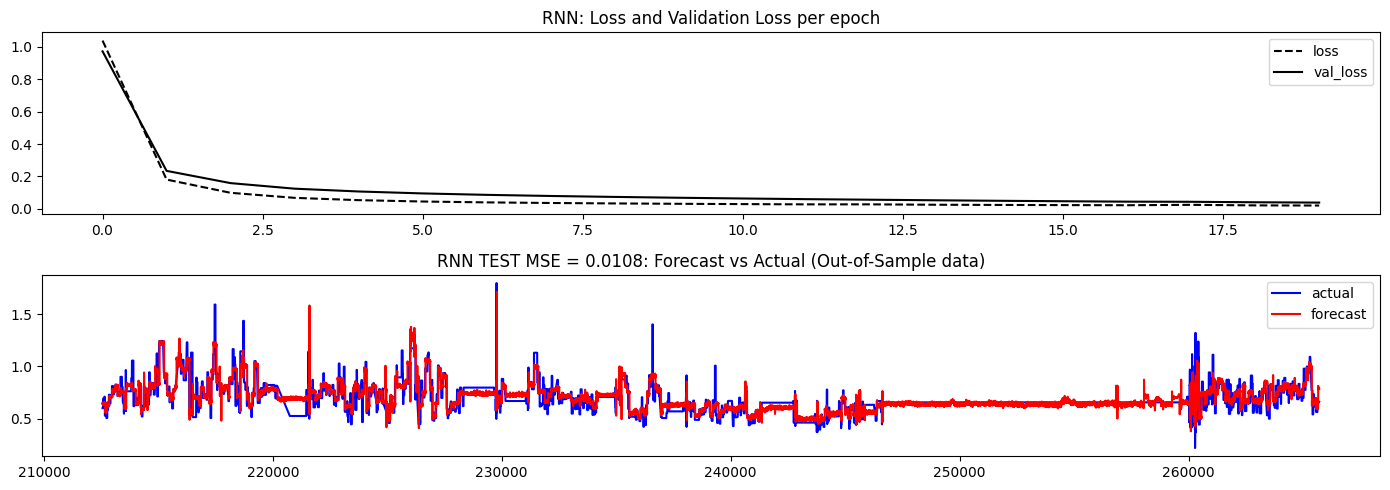

In [45]:

si_normal_rnn, history_normal_rnn = train_model_pt('RNN', **params_si)



## Inference


In [64]:

def inference_model_pt_2(model, model_type='RNN', **kwargs):
    ''' 
    if model_type=='RNN':
        model = RNN(kwargs['seq_length'],
                    kwargs['input_size'], 
                    kwargs['output_size'], 
                    kwargs['units'], 
                    kwargs['n_layers'])
    elif model_type=='LSTM':
        model = LSTM(kwargs['seq_length'],
                     kwargs['input_size'], 
                     kwargs['output_size'], 
                     kwargs['units'], 
                     kwargs['n_layers'])
    elif model_type=='GRU':
         model = LSTM(kwargs['seq_length'],
                      kwargs['input_size'], 
                      kwargs['output_size'], 
                      kwargs['units'], 
                      kwargs['n_layers'])
        
    '''
    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        ## if i == 0:
        input_test_x = x_test[i]    ## [1, 30x18]
        input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ## print(y_pred)
            
            ## print("y_pred", y_pred.shape)
            
            ## temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            ## concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            ## new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            ## input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        



In [73]:

def inference_model_pt(model, model_type='RNN', **kwargs):

    
    x_test, y_test   = kwargs['test_data']
    n_test = x_test.shape[0]

    list_real_si = []
    list_pred_si = []

    input_test_x = 0

    ## h0       = model.init_hidden( 1 )
    
    for i in range( n_test ):

        if i == 0:
            input_test_x = x_test[i]    ## [1, 30x18]
            input_test_x = input_test_x.unsqueeze(0)

        if i % 10000 == 0:
            print(i)
        
        model.eval()
        with torch.no_grad():
            h0       = model.init_hidden( 1 )
            ## print("h0", h0.shape)
            ## print(" input_test_x", input_test_x.shape)
            y_pred, h0 = model( input_test_x , h0 )
            ## y_pred.view((-1))
            ##############################
            ## print(y_pred[:, 1:])
            ## print(x_test[i, -18:])
            ## input()
            ##############################
            
            ## print("y_pred", y_pred.shape)
            
            temp_x_test = input_test_x[:, 18:]
            ## print("temp_x_test", temp_x_test.shape)
            concat_part = y_pred[:, 1:]
            ## print("concat_part", concat_part.shape)
            new_x_test = torch.cat((temp_x_test , concat_part), 1)
            ## print("new_x_test", new_x_test.shape)
            ## print(new_x_test[:, -20:])
            
            
            input_test_x = new_x_test
            
            
            y_pred_si     = y_pred[:, 0].detach().numpy() 

            y_real_si     = y_test[i, 0].detach().numpy() 

            ## print(y_pred_si)

            ## input()

            the_sigma = scale_civs.sigma[-19]
            the_mu    = scale_civs.mu[-19]

            y_pred_si = (y_pred_si * the_sigma) + the_mu 
            y_real_si = (y_real_si * the_sigma) + the_mu 

            list_real_si.append(y_real_si )
            list_pred_si.append(y_pred_si)

    return list_real_si, list_pred_si
            
        
    




## Inference sanity check first


In [50]:

model = si_normal_rnn


In [51]:


l_real, l_pred = inference_model_pt_2(model, model_type='RNN', **params_si)


0
10000
20000
30000
40000
50000


In [52]:

l_real[:20]


[0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452]

In [53]:

l_pred[:20]


[array([0.6487728], dtype=float32),
 array([0.64817977], dtype=float32),
 array([0.6475383], dtype=float32),
 array([0.647305], dtype=float32),
 array([0.6399972], dtype=float32),
 array([0.6496047], dtype=float32),
 array([0.6445725], dtype=float32),
 array([0.64587665], dtype=float32),
 array([0.65002245], dtype=float32),
 array([0.6395353], dtype=float32),
 array([0.64497924], dtype=float32),
 array([0.64963204], dtype=float32),
 array([0.6470867], dtype=float32),
 array([0.6472113], dtype=float32),
 array([0.64679074], dtype=float32),
 array([0.64504516], dtype=float32),
 array([0.6443362], dtype=float32),
 array([0.6443442], dtype=float32),
 array([0.6455439], dtype=float32),
 array([0.639969], dtype=float32)]

In [54]:

## plt.rcParams["figure.figsize"] = [14, 5] 


53141


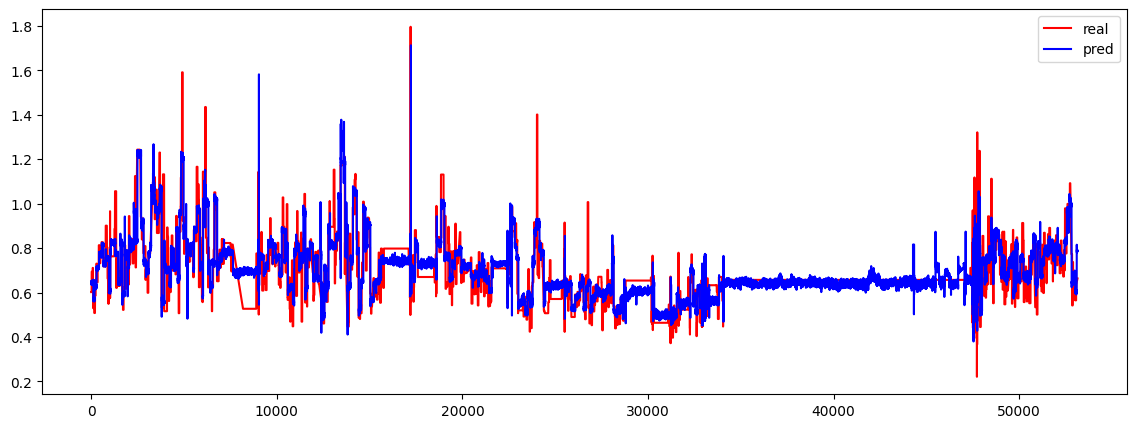

In [55]:


  
# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Now run actual INFERENCE to predict x vector and silicon together


In [74]:

model = si_normal_rnn


In [75]:

l_real, l_pred = inference_model_pt(model, model_type='RNN', **params_si)


0
10000
20000
30000
40000
50000


In [76]:

l_real[:20]


[0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452,
 0.6020000095062452]

In [77]:

l_pred[:20]


[array([0.6487728], dtype=float32),
 array([0.60959285], dtype=float32),
 array([0.56686497], dtype=float32),
 array([0.52229184], dtype=float32),
 array([0.4730777], dtype=float32),
 array([0.4256282], dtype=float32),
 array([0.3735922], dtype=float32),
 array([0.32486075], dtype=float32),
 array([0.27400923], dtype=float32),
 array([0.23010302], dtype=float32),
 array([0.18759859], dtype=float32),
 array([0.15532988], dtype=float32),
 array([0.12627113], dtype=float32),
 array([0.10796303], dtype=float32),
 array([0.09183663], dtype=float32),
 array([0.08430266], dtype=float32),
 array([0.07680464], dtype=float32),
 array([0.07540733], dtype=float32),
 array([0.07331562], dtype=float32),
 array([0.07652986], dtype=float32)]

53141


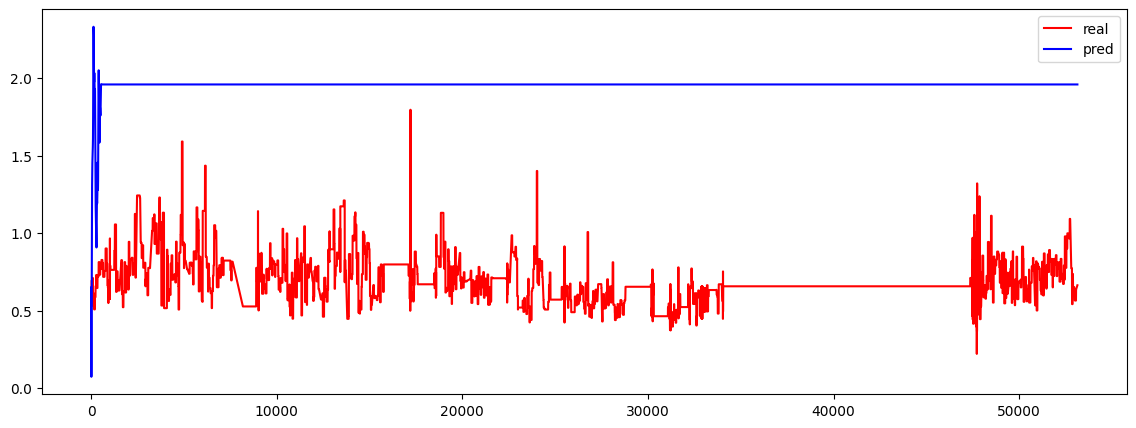

In [78]:

# create data 
x = [ i for i in range(len(l_real)) ] 
print(len(x))
  
# plot lines 

plt.plot(x, l_real, label = "real", color='red') 
plt.plot(x, l_pred, label = "pred", color='blue') 
plt.legend() 
plt.show()



## Testing dimensions with random data


In [ ]:

x_test_rc = torch.randn( (100, 40) )   ## seq 10, vector 4

y_test_rc = torch.randn( (100, 5)  )   ## vector 4 + si
    
    

In [ ]:
x_test_rc.shape

In [ ]:
y_test_rc.shape

In [ ]:

n_test = x_test_rc.shape[0]
n_test


In [ ]:

list_real_si_rc = []
list_pred_si_rc = []


In [ ]:

for i in range( n_test ):

        input_test_x = x_test_rc[1, :]
        print( input_test_x.shape )
        
        y_pred = torch.randn( (1, 5) )
        print(y_pred.shape)
        
        temp_x_test = input_test_x[:,4:]
        print(temp_x_test.shape)
    
        concat_part = y_pred[:, 1:]
        print(concat_part.shape)
        
      
        new_x_test = torch.cat( [temp_x_test , concat_part] )
        print(new_x_test.shape)
        input()
        '''
    
        input_test_x = new_x_test
        y_pred_si = y_pred[0]
        y_real     = y_test[i]
        y_real_si  = y_real[0]

        list_real_si.append(y_real_si )
        list_pred_si.append(y_pred_si)
        '''
